In [293]:
import pandas as pd

In [294]:
df = pd.read_csv("taxi_trip_pricing.csv")
# print(df.head())
# print(df.shape)
# print(df.columns.tolist())
# df.info()
df.head()
df.shape
df.isnull().sum()


Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [295]:
df["Trip_Distance_km"] = df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median())
df["Trip_Distance_km"].isnull().sum()
df["Trip_Distance_km"].sort_values(ascending=True).head(10)


821    1.23
208    1.25
72     1.27
128    1.34
205    1.45
407    1.53
945    1.54
456    1.56
840    1.64
898    1.64
Name: Trip_Distance_km, dtype: float64

In [296]:
import numpy as np
df['Trip_Distance_km_log'] = np.log1p(df['Trip_Distance_km'])

In [297]:
import numpy as np

def suggest_imputation(df, column):
    """
    Takes a dataframe and a column name,
    calculates skewness and suggests mean or median for missing value handling.
    """
    if column not in df.columns:
        return f"Column '{column}' not found in DataFrame."
    
    if not np.issubdtype(df[column].dtype, np.number):
        return f"Column '{column}' is not numeric. Cannot calculate skewness."

    skew = df[column].skew()

    if -0.5 <= skew <= 0.5:
        return f"{column}: skew = {skew:.2f} → Nearly symmetric → Suggest **MEAN**"
    elif skew > 0.5:
        return f"{column}: skew = {skew:.2f} → Right skew → Suggest **MEDIAN**"
    else:  # skew < -0.5
        return f"{column}: skew = {skew:.2f} → Left skew → Suggest **MEDIAN**"

suggest_imputation(df, "Trip_Price")

'Trip_Price: skew = 3.73 → Right skew → Suggest **MEDIAN**'

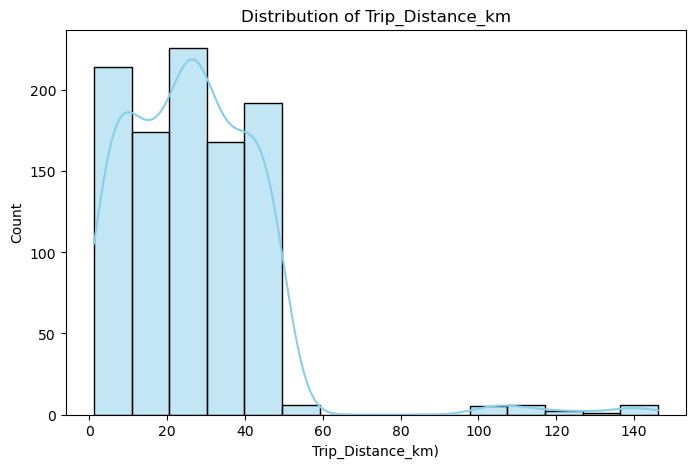

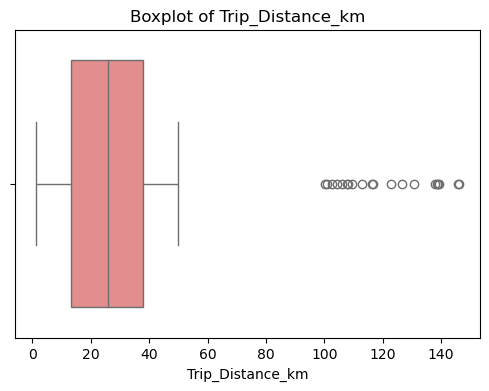

In [298]:
# df['Trip_Distance_km'].unique().tolist()

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["Trip_Distance_km"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Trip_Distance_km")
plt.xlabel("Trip_Distance_km)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Trip_Distance_km"], color="lightcoral")
plt.title("Boxplot of Trip_Distance_km")
plt.xlabel("Trip_Distance_km")
plt.show()


In [299]:
df["Time_of_Day"].unique().tolist()
df["Time_of_Day"] = df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0])
df["Time_of_Day"].isnull().sum()

df.groupby("Time_of_Day")["Trip_Price"].mean() # Check Time of the day, how effecting on trip price as average
dummies = pd.get_dummies(df["Time_of_Day"], prefix="Time", drop_first=True)
df = pd.concat([df, dummies], axis=1) # Keep the orignal column and other too



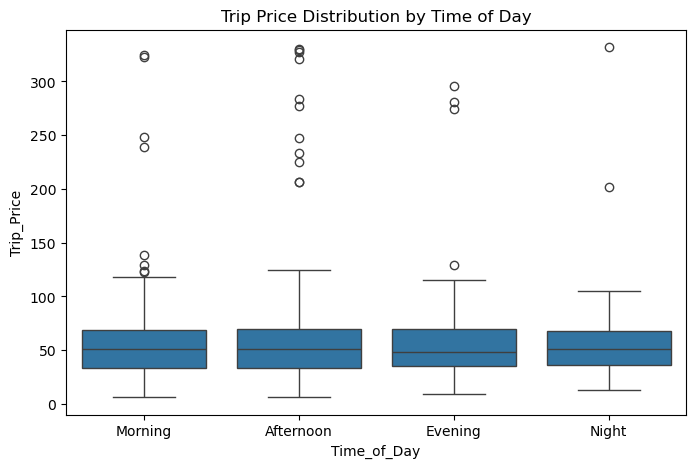

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Time_of_Day", y="Trip_Price", data=df)
plt.title("Trip Price Distribution by Time of Day")

plt.show()


In [303]:
# df.info()
# df['Day_of_Week'].unique().tolist()
# df["Day_of_Week"] = df["Day_of_Week"].fillna(df["Day_of_Week"].mode()[0])

# df = pd.get_dummies(df, columns=["Day_of_Week"], prefix="Day", drop_first=True)

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Passenger_Count        950 non-null    float64
 3   Traffic_Conditions     950 non-null    object 
 4   Weather                950 non-null    object 
 5   Base_Fare              950 non-null    float64
 6   Per_Km_Rate            950 non-null    float64
 7   Per_Minute_Rate        950 non-null    float64
 8   Trip_Duration_Minutes  950 non-null    float64
 9   Trip_Price             951 non-null    float64
 10  Trip_Distance_km_log   1000 non-null   float64
 11  Time_Evening           1000 non-null   bool   
 12  Time_Morning           1000 non-null   bool   
 13  Time_Night             1000 non-null   bool   
 14  Day_Weekend            1000 non-null   bool   
dtypes: bo

Trip_Distance_km          0
Time_of_Day               0
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
Trip_Distance_km_log      0
Time_Evening              0
Time_Morning              0
Time_Night                0
Day_Weekend               0
dtype: int64

In [304]:
df.groupby("Passenger_Count")["Trip_Price"].mean() # Check Time of the day, how effecting on trip price as average
df["Passenger_Count"] = df["Passenger_Count"].fillna(df["Passenger_Count"].mean())
df["Passenger_Count"] = df["Passenger_Count"].astype(int)


In [305]:
# Step 1: Fill missing with mode
df["Traffic_Conditions"] = df["Traffic_Conditions"].fillna(df["Traffic_Conditions"].mode()[0])

# # Step 2: Map values
mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Traffic_Conditions_mapped"] = df["Traffic_Conditions"].map(mapping)

print(df["Traffic_Conditions_mapped"].unique())


[1 3 2]


In [307]:
# df["Weather"].unique().tolist()

# df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])
# df = pd.get_dummies(df, columns=["Weather"], prefix="Weather", drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Time_of_Day                1000 non-null   object 
 2   Passenger_Count            1000 non-null   int32  
 3   Traffic_Conditions         1000 non-null   object 
 4   Base_Fare                  950 non-null    float64
 5   Per_Km_Rate                950 non-null    float64
 6   Per_Minute_Rate            950 non-null    float64
 7   Trip_Duration_Minutes      950 non-null    float64
 8   Trip_Price                 951 non-null    float64
 9   Trip_Distance_km_log       1000 non-null   float64
 10  Time_Evening               1000 non-null   bool   
 11  Time_Morning               1000 non-null   bool   
 12  Time_Night                 1000 non-null   bool   
 13  Day_Weekend                1000 non-null   bool  

<Axes: >

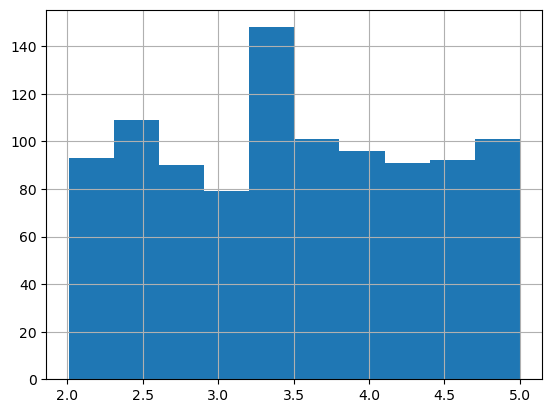

In [308]:
df["Base_Fare"] = df["Base_Fare"].fillna(df["Base_Fare"].mean())
df["Base_Fare"].hist()


<Axes: >

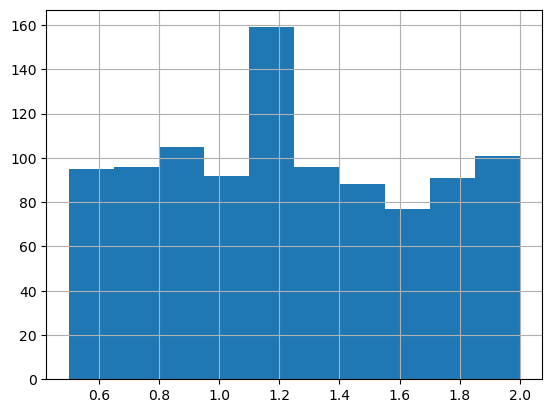

In [309]:
df["Per_Km_Rate"] = df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].mean())
df["Per_Km_Rate"].hist()

In [310]:
df["Per_Minute_Rate"] = df["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].mean())
df["Trip_Duration_Minutes"] = df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].mean())



In [311]:
# def detect_outliers_iqr(df):
#     numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
#     for col in numeric_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR

#         outliers = df[(df[col] < lower) | (df[col] > upper)]
#         print(f"{col}: {len(outliers)} outliers found")

# # Example usage
# detect_outliers_iqr(df)


In [318]:
# 1. Drop missing target values
df = df.dropna(subset=["Trip_Price"])

# 2. Create log-transformed target (unscaled)
df["Trip_Price_log"] = np.log1p(df["Trip_Price"])

# 3. (Optional) Check skewness improvement
print("Skew before:", df["Trip_Price"].skew())
print("Skew after log1p:", df["Trip_Price_log"].skew())

# 4. Convert bools to ints
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


Skew before: 3.732560575003673
Skew after log1p: 0.00037947007027506075


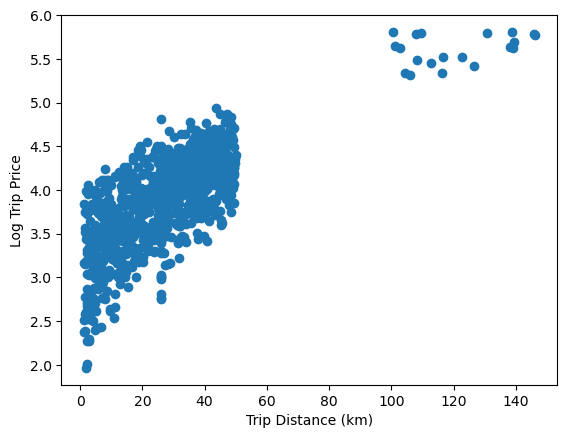

In [319]:
import matplotlib.pyplot as plt

plt.scatter(df["Trip_Distance_km"], df["Trip_Price_log"])
plt.xlabel("Trip Distance (km)")
plt.ylabel("Log Trip Price")
plt.show()


In [320]:
# features = [
#     'Trip_Distance_km_log', 'Passenger_Count', 'Base_Fare',
#     'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
#     'Traffic_Conditions_mapped', 'Time_Evening', 'Time_Morning',
#     'Time_Night', 'Weather_Rain', 'Weather_Snow'
# ]
# target = 'Trip_Price_log'  # if you want to predict log(price)

# Columns to drop (redundant or target column)
drop_cols = [
    # 'Trip_Price',          # raw target (using Trip_Price_log instead)
    'Trip_Distance_km',    # replaced with log version
    'Time_of_Day',         # replaced with dummy vars
    'Day_of_Week',         # only keep if you encode it
    'Traffic_Conditions',  # replaced with mapped version
    'Weather'              # replaced with dummy vars (Rain/Snow)
]

# Drop in place
df = df.drop(columns=drop_cols, errors='ignore')

print("Remaining columns:")
print(df.columns.tolist())



Remaining columns:
['Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Trip_Distance_km_log', 'Time_Evening', 'Time_Morning', 'Time_Night', 'Day_Weekend', 'Traffic_Conditions_mapped', 'Weather_Rain', 'Weather_Snow', 'Trip_Price_log']


In [321]:
# Scaling
from sklearn.preprocessing import StandardScaler

# cols_to_scale = ['Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate']
# df[cols_to_scale] = StandardScaler().fit_transform(df[cols_to_scale])

df.describe()

Passenger_Count   Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
count       951.000000  951.000000   951.000000       951.000000   
mean          2.455310    3.497373     1.230090         0.293852   
std           1.077937    0.846420     0.419884         0.112389   
min           1.000000    2.010000     0.500000         0.100000   
25%           2.000000    2.765000     0.870000         0.200000   
50%           2.000000    3.502989     1.233316         0.292916   
75%           3.000000    4.170000     1.580000         0.390000   
max           4.000000    5.000000     2.000000         0.500000   

       Trip_Duration_Minutes  Trip_Price  Trip_Distance_km_log  Time_Evening  \
count             951.000000  951.000000            951.000000    951.000000   
mean               62.047722   56.874773              3.085902      0.207150   
std                31.529351   40.469791              0.776210      0.405477   
min                 5.010000    6.126900              0.802002      0.000000   
25%                36.650000   33.742650              2.648300      0.000000   
50%                62.118116   50.074500              3.289521      0.000000   
75%                87.875000   69.099350              3.659193      0.000000   
max               119.840000  332.043689              4.990889      1.000000   

       Time_Morning  Time_Night  Day_Weekend  Traffic_Conditions_mapped  \
count    951.000000  951.000000   951.000000                 951.000000   
mean       0.278654    0.093586     0.297581                   1.735016   
std        0.448573    0.291405     0.457435                   0.746376   
min        0.000000    0.000000     0.000000                   1.000000   
25%        0.000000    0.000000     0.000000                   1.000000   
50%        0.000000    0.000000     0.000000                   2.000000   
75%        1.000000    0.000000     1.000000                   2.000000   
max        1.000000    1.000000     1.000000                   3.000000   

       Weather_Rain  Weather_Snow  Trip_Price_log  
count    951.000000    951.000000      951.000000  
mean       0.227129      0.057834        3.895528  
std        0.419197      0.233552        0.560493  
min        0.000000      0.000000        1.963876  
25%        0.000000      0.000000        3.547968  
50%        0.000000      0.000000        3.933285  
75%        0.000000      0.000000        4.249913  
max        1.000000      1.000000        5.808274

In [322]:

from sklearn.model_selection import train_test_split

# Features: drop BOTH Trip_Price and Trip_Price_log (target shouldn't be in X)
X = df.drop(["Trip_Price", "Trip_Price_log"], axis=1)

# Target: use log-transformed price
y = df["Trip_Price_log"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Create polynomial features
poly = PolynomialFeatures(degree=2)   # degree=2 (quadratic), try higher if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Initialize model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)


LinearRegression()

In [341]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
linear_MSE = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R2:", r2_poly)
print("Linear Regression MSE:", linear_MSE)
print("Linear Regression R2:", r2_linear)

Polynomial Regression MSE: 0.020411325597998395
Polynomial Regression R2: 0.9325351125189884
Linear Regression MSE: 0.051805039614962786
Linear Regression R2: 0.8287704954882721


In [342]:
if r2_poly > r2_linear:
    print("Polynomial Regression is better")
else:
    print("Linear Regression is better")


Polynomial Regression is better


In [350]:
# Suppose you trained already:

# New taxi ride data (same features as X_train)
new_data = pd.DataFrame({
    "Passenger_Count": [3],
    "Base_Fare": [3.56],
    "Per_Km_Rate": [0.8],
    "Per_Minute_Rate": [0.32],
    "Trip_Duration_Minutes": [53.82],
    "Trip_Distance_km_log": [2.996],  
    "Time_Evening": [0],
    "Time_Morning": [1],
    "Time_Night": [0],
    "Day_Weekend": [0],
    "Traffic_Conditions_mapped": [0],
    "Weather_Rain": [0],
    "Weather_Snow": [0]
})
# Predict (this will give you log-price if your target was Trip_Price_log)

new_data_poly = poly.transform(new_data) # Polynomial
y_pred_new = poly_model.predict(new_data_poly)

y_pred = model.predict(new_data)   # Linear
real_price_linear = np.expm1(y_pred)

# print("Predicted log-price:", y_pred_new)

# Convert log-price back to real price
real_price_poly = np.expm1(y_pred_new)   # inverse of log1p
print("Predicted real price (Polynomial):", real_price_poly)
print("Predicted real price (Linear):", real_price_linear)



Predicted real price (Polynomial): [32.2145881]
Predicted real price (Linear): [36.0961389]
